## Project Title: Classifying Iris Species: A Data-Driven Approach

## Objective:

Classify Iris-setosa, Iris-versicolor, and Iris-virginica using sepal and petal measurements.

Identify which features are the best for classification.

Dataset: Iris dataset (from Scikit-Learn or UCI Machine Learning Repository)

## Methods Used:

1)Exploratory Data Analysis (EDA)

2)Hypothesis Testing (T-test for feature significance)

3)Logistic Regression for Classification


## 1️⃣ Importing Required Libraries
We begin by importing necessary Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn for data analysis, visualization, and machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## 2️⃣ Loading and Inspecting Data

In [4]:
df=pd.read_csv(r"C:\Users\dramy\Downloads\tempdata\bezdekIris.data",header=None)

In [5]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.columns=['Sepal_length','Sepal_Width','Petal_length','Petal_width','Speciestype']

In [7]:
df.columns

Index(['Sepal_length', 'Sepal_Width', 'Petal_length', 'Petal_width',
       'Speciestype'],
      dtype='object')

## 3️⃣ Exploratory Data Analysis (EDA)-Check for missing values & basic statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Speciestype   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,Sepal_length,Sepal_Width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
ax=df.groupby(['Speciestype']).agg({
    'Sepal_length':['mean','min','max','std'],
    'Sepal_Width':['mean','min','max','std'],
    'Petal_length':['mean','min','max','std'],
    'Petal_width':['mean','min','max','std']
})
print(ax)

                Sepal_length                     Sepal_Width            \
                        mean  min  max       std        mean  min  max   
Speciestype                                                              
Iris-setosa            5.006  4.3  5.8  0.352490       3.428  2.3  4.4   
Iris-versicolor        5.936  4.9  7.0  0.516171       2.770  2.0  3.4   
Iris-virginica         6.588  4.9  7.9  0.635880       2.974  2.2  3.8   

                          Petal_length                     Petal_width       \
                      std         mean  min  max       std        mean  min   
Speciestype                                                                   
Iris-setosa      0.379064        1.462  1.0  1.9  0.173664       0.246  0.1   
Iris-versicolor  0.313798        4.260  3.0  5.1  0.469911       1.326  1.0   
Iris-virginica   0.322497        5.552  4.5  6.9  0.551895       2.026  1.4   

                                
                 max       std  
Speciestype   

## 4️⃣ Pairplot Analysis

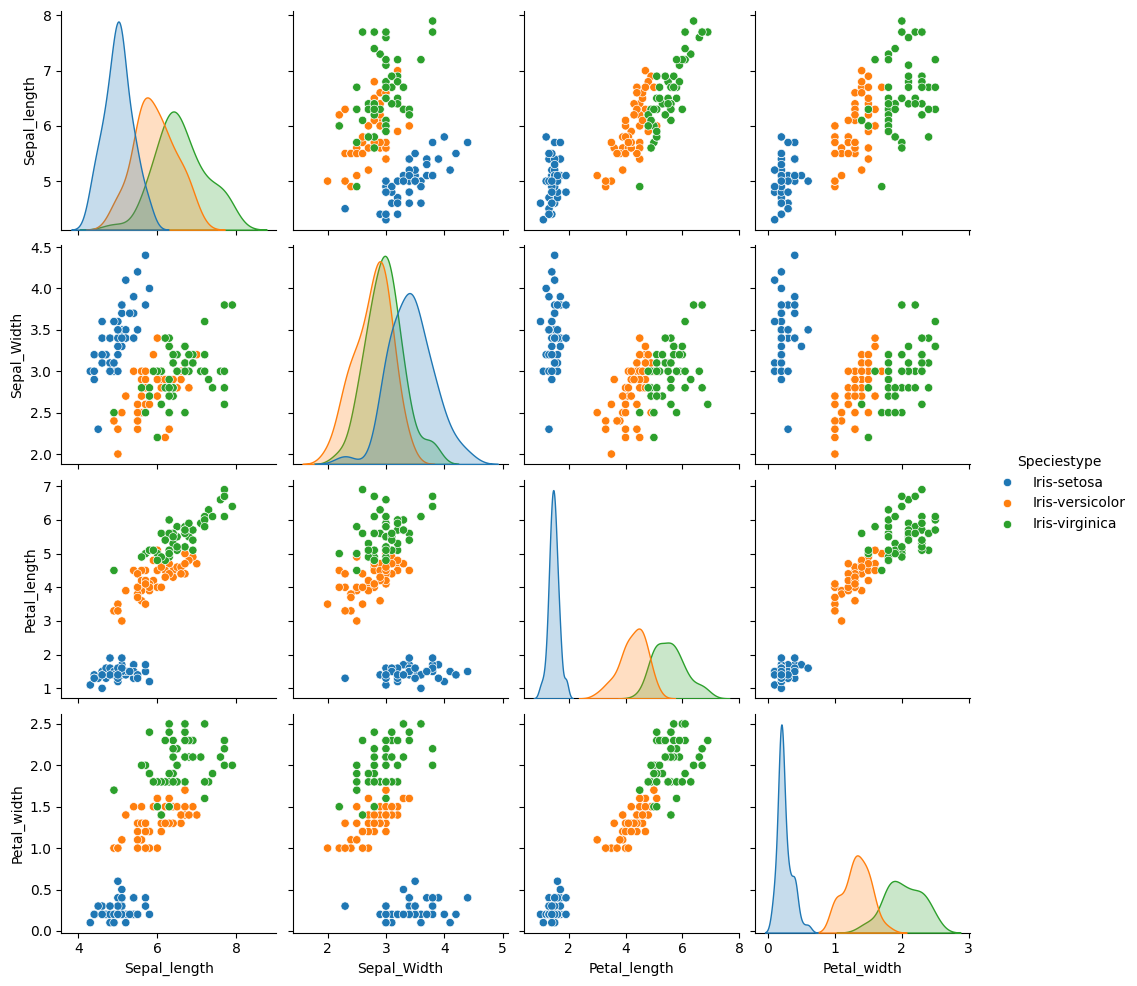

In [11]:
sns.pairplot(data=df,hue='Speciestype')

From the pairplot, I can see that Iris-setosa is clearly distinguished from the other species. My next goal is to analyze petal length and petal width to find a distinguishing factor between Iris-versicolor and Iris-virginica.

The reason for selecting petal length and petal width is that sepal length and sepal width show a lot of overlap between Iris-versicolor and Iris-virginica, making it difficult to draw a clear distinction between them. However, petal length and petal width show a noticeable separation between these two species, although there is still some minor overlap.

This insight suggests that petal length and width could be better differentiating factors compared to sepal length and width. So, my next step is to focus on analyzing petal measurements to find patterns that help in classification.

## 5️⃣Violin Plots for Feature Distributions

Text(0.5, 1.0, 'IRIS VERSICOLOR DISTRIBUTION')

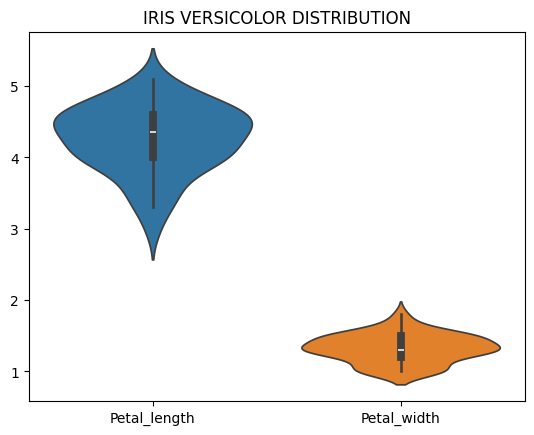

In [12]:
distribution=df[['Petal_length','Petal_width','Speciestype']]
filtered_data=distribution[distribution['Speciestype']=='Iris-versicolor']
sns.violinplot(data=filtered_data)
plt.title('IRIS VERSICOLOR DISTRIBUTION')

Text(0.5, 1.0, 'Iris-virginica distribution')

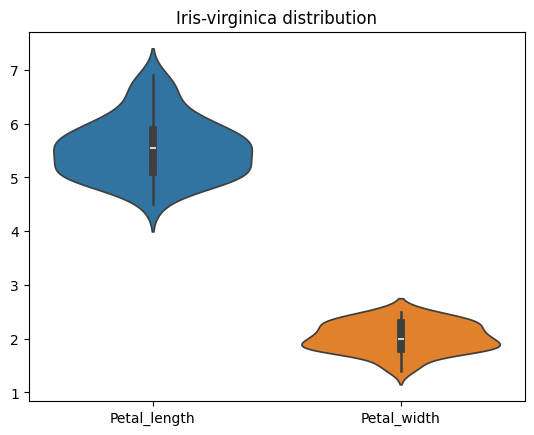

In [13]:
filtered_data2=distribution[distribution['Speciestype']=='Iris-virginica']
sns.violinplot(data=filtered_data2)
plt.title('Iris-virginica distribution')

For Iris-versicolor & Iris-virginica
Sepal Length > Sepal Width
Petal Length > Petal Width
These two species overlap, meaning we need better distinguishing parameters.

Text(0.5, 1.0, 'IRIS VERSICOLOR SEPAL LENGTH V/S PETAL WIDTH')

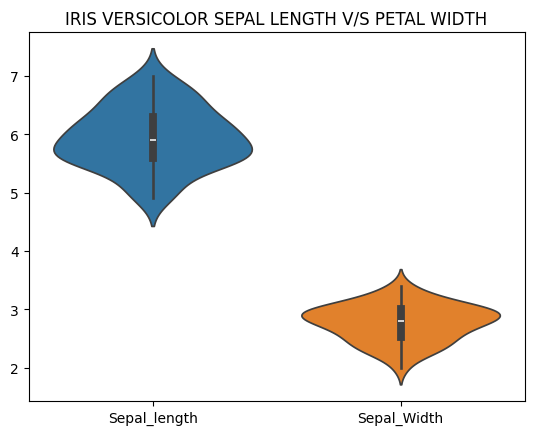

In [14]:
distribution2=df[['Sepal_length','Sepal_Width','Speciestype']]
comp1=distribution2[distribution2['Speciestype']=='Iris-versicolor']
sns.violinplot(data=comp1)
plt.title('IRIS VERSICOLOR SEPAL LENGTH V/S PETAL WIDTH')

Text(0.5, 1.0, 'IRIS VIRGINICA SEPAL LENGTH V/S PETAL WIDTH')

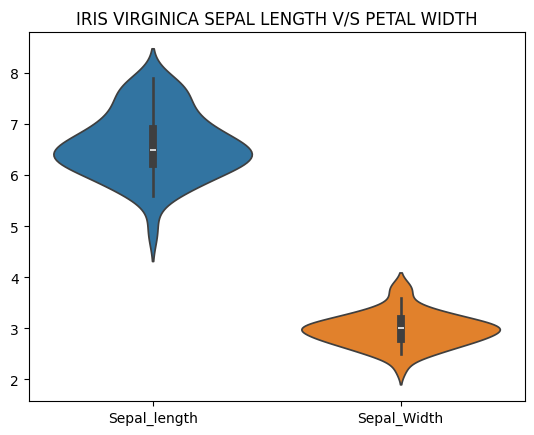

In [15]:
distribution2=df[['Sepal_length','Sepal_Width','Speciestype']]
comp2=distribution2[distribution2['Speciestype']=='Iris-virginica']
sns.violinplot(data=comp2)
plt.title('IRIS VIRGINICA SEPAL LENGTH V/S PETAL WIDTH')

Sepal Length: Highest in both species but slightly greater in Iris-virginica.
Petal Length: Also higher in Iris-virginica than in Versicolor.
Sepal Width & Petal Width: Show less variation but still have slight differences.

## 6️⃣ Histogram: To visualize the range and spread of petal length in both species.


<Axes: xlabel='Petal_length', ylabel='Count'>

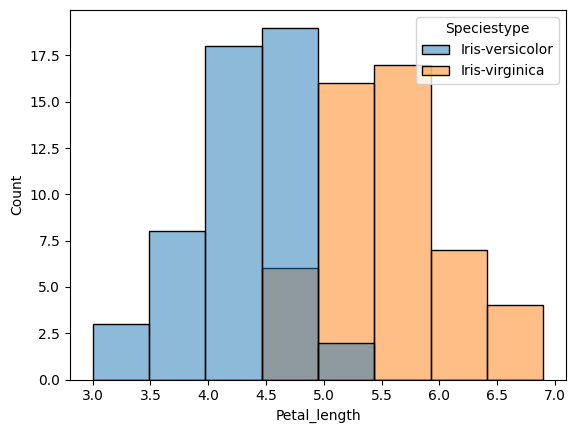

In [16]:
distribution=df[['Petal_length','Petal_width','Speciestype']]
filtered_data3=distribution[distribution['Speciestype'].isin(['Iris-versicolor','Iris-virginica'])]
sns.histplot(data=filtered_data3,x='Petal_length',hue='Speciestype')

1. Petal Length Distribution Difference:
Iris-versicolor (blue bars) mostly has petal lengths between 3.0 to 5.0 cm.
Iris-virginica (orange bars) has petal lengths between 4.5 to 7.0 cm.

3. Overlapping Region:
There is some overlap in petal length between 4.5 to 5.0 cm, meaning that some flowers in both species share similar petal lengths.
However, above 5.0 cm, almost all flowers belong to Iris-virginica, which indicates petal length is a distinguishing feature.

4. Petal Length as a Classifier:
If a flower has a petal length below 4.5 cm, it's most likely Iris-versicolor.

  If a flower has a petal length above 5.5 cm, it’s almost certainly Iris-virginica.

  The range 4.5 to 5.0 cm is ambiguous, meaning it could belong to either species.

<Axes: xlabel='Sepal_length', ylabel='Count'>

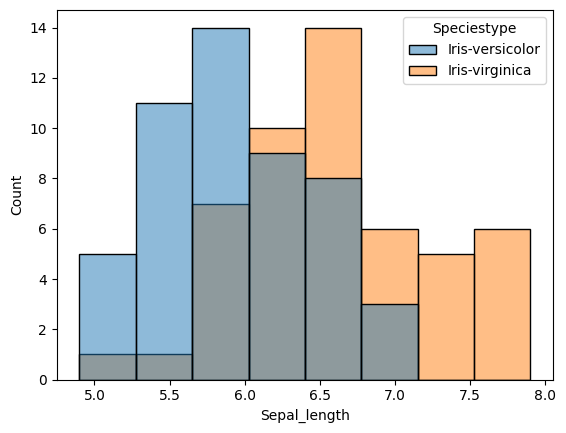

In [17]:
distribution2=df[['Sepal_length','Sepal_Width','Speciestype']]
filtered_data4=distribution2[distribution2['Speciestype'].isin(['Iris-versicolor','Iris-virginica'])]
sns.histplot(data=filtered_data4,x='Sepal_length',hue='Speciestype')

Overlap in Sepal Length:
Both Iris-versicolor and Iris-virginica have overlapping sepal lengths in the range of 5.0 cm to 7.0 cm, making it harder to differentiate them based on sepal length alone.
Iris-versicolor (Blue Bars):
Most flowers have sepal lengths between 5.0 cm and 6.5 cm.
Peak around 6.0 cm, meaning this is the most common sepal length for this species.
Iris-virginica (Orange Bars):
Starts at 5.0 cm but extends up to 7.9 cm, meaning it has a broader range.
The most frequent sepal length is around 6.5 cm.



<Axes: xlabel='Petal_width', ylabel='Count'>

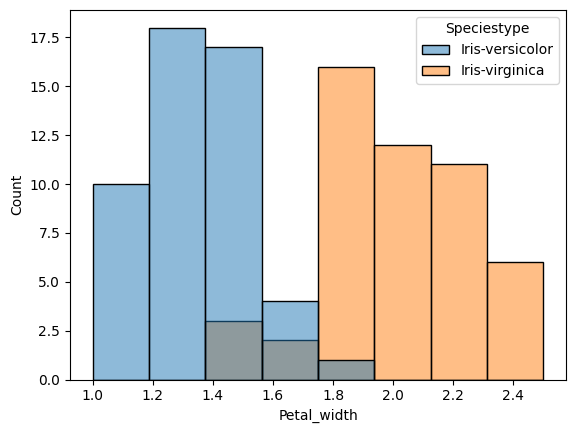

In [18]:
distribution3=df[['Petal_length','Petal_width','Speciestype']]
filtered_data4=distribution3[distribution3['Speciestype'].isin(['Iris-versicolor','Iris-virginica'])]
sns.histplot(data=filtered_data4,x='Petal_width',hue='Speciestype')

<Axes: xlabel='Sepal_Width', ylabel='Count'>

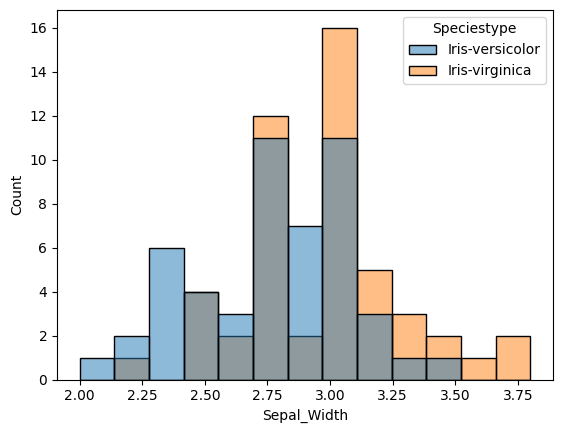

In [19]:
distribution4=df[['Sepal_length','Sepal_Width','Speciestype']]
filtered_data5=distribution4[distribution4['Speciestype'].isin(['Iris-versicolor','Iris-virginica'])]
sns.histplot(data=filtered_data5,x='Sepal_Width',hue='Speciestype')

Petal Length and Petal Width as Stronger Differentiators:

Degree of Overlapping in Sepal Features:

Sepal length and sepal width show considerable overlap, meaning that if a classification model relies only on sepal dimensions, it may struggle to distinguish between Iris versicolor and Iris virginica effectively.

Iris virginica generally has larger sepals, but the significant overlap means this isn’t a foolproof feature.

Threshold-Based Classification:

Based on the histograms, if a flower has a petal length greater than 5.5 cm, it is almost certainly Iris virginica.

Similarly, if a flower has a petal width greater than 2.0 cm, it is most likely Iris virginica.

The ambiguous regions (4.5-5.5 cm for petal length and 1.4-2.0 cm for petal width) might require additional features to improve classification.

## Futher analysis with Quantative testing 

In [20]:
distribution3=df[['Petal_length','Petal_width','Speciestype']]
filtered_data5=distribution3[distribution3['Speciestype'].isin(['Iris-versicolor','Iris-virginica'])]

grp_by=filtered_data5.groupby(['Speciestype']).agg({
    'Petal_length':['mean','median','std'],
    'Petal_width':['mean','median','std']
})
print(grp_by)

                Petal_length                  Petal_width                 
                        mean median       std        mean median       std
Speciestype                                                               
Iris-versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753
Iris-virginica         5.552   5.55  0.551895       2.026    2.0  0.274650


The standard deviations for Iris-virginica are slightly higher, indicating a bit more spread in its measurements. This increased variation can contribute to some overlap in the distributions.
Even though there is a minor overlapping region, the shift in means and medians suggests that petal features are strong candidates for differentiation between these two species.

In [21]:
from scipy.stats import ttest_ind

## 6️⃣ Hypothesis Testing (T-test)
We perform statistical hypothesis testing to determine whether petal and sepal measurements differ significantly between species. **Conclusion:** A very low p-value (<0.05) confirms that the differences are statistically significant.

In [22]:
distribution3=df[['Petal_length','Petal_width','Speciestype']]

Species2=distribution3[distribution3['Speciestype']=='Iris-versicolor']
Species3=distribution3[distribution3['Speciestype']=='Iris-virginica']

species2_petal_length = Species2['Petal_length']
species3_petal_length = Species3['Petal_length']

species2_petal_width = Species2['Petal_width']
species3_petal_width = Species3['Petal_width']

def compute_p_value(group1, group2):
       t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
       return p_value

p_value_length = compute_p_value(species2_petal_length, species3_petal_length)
p_value_width = compute_p_value(species2_petal_width, species3_petal_width)

print(f"P-value for Petal Length: {p_value_length}")
print(f"P-value for Petal Width: {p_value_width}")


P-value for Petal Length: 4.900287527398095e-22
P-value for Petal Width: 2.111534400988573e-25


## 7️⃣ Logistic Regression Model
A logistic regression model is trained to classify the three species based on their features. The model's accuracy and confusion matrix are evaluated.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe 'df' has columns: 'Petal_length', 'Petal_width', and 'Speciestype'
# Filter the data to include only Iris-versicolor and Iris-virginica
filtered_df = df[df['Speciestype'].isin(['Iris-versicolor', 'Iris-virginica'])]

# Create feature matrix X and target variable y
X = filtered_df[['Petal_length', 'Petal_width']]
y = filtered_df['Speciestype']

# Encode target labels (convert species names to numeric values)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Instantiate and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.95
Confusion Matrix:
[[11  1]
 [ 0  8]]
